In [30]:
from tweepy.streaming import StreamListener #class alows to listen based certain words
from tweepy import OAuthHandler #auth based on ID in other file
from tweepy import Stream #stream the tweets
from tweepy import API #Twitter API
from tweepy import Cursor 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob

In [31]:
class ListenerOutPut(StreamListener):#allows us to stream the tweets
    
    def on_data(self, data):#takes in data from streamlistener
        print(data)#prints the data
        return True
    
    def on_error(self, status):#tells us if an error happens
        if status == (420): #so if you cross the rate limit returns false on connection
            return false
        
        print(status)
#all of this part allows us to stream tweet made in real time to STDOUT

In [32]:
class AuthenticateTwitter():
    
    def AuthenticTwitterApp(self):
        Authenticate = OAuthHandler("CONSUMER TOKEN","CONSUMER S TOKEN")
        Authenticate.set_access_token("ACCESS TOKEN","ACCESS S TOKEN")
        
        return Authenticate

In [33]:
class ClientTwitter():
    
    def __init__ (self, user_twitter=None):
        self.Authenticate = AuthenticateTwitter().AuthenticTwitterApp()
        self.twitter_client = API(self.Authenticate) 
        self.user_twitter = user_twitter
        
    #tweet analysis
    def Twitter_API(self):
        
        return self.twitter_client

In [34]:
class AnalyseTweetTwitter():
        
    def D_F_Tweets(self, TTweets):
        #DATA CLEANSING
        #SHOWS TWEET
        dftweet = pd.DataFrame(data=[tweet.text for tweet in TTweets], columns=['TTweets']) 
        #SHOWS SENTIMENT OF TWEET        
        dftweet['SA of Tweet'] = np.array([SentimentTwitter().Tweet_Analyse_Sent(tweet) for tweet in dftweet['TTweets']])
        #SHOWS HOW MANY LIKES
        dftweet['Likes']= np.array([tweet.favorite_count for tweet in TTweets])
        #WHEN CREATED
        dftweet['Created']= np.array([tweet.created_at for tweet in TTweets])
        #SHOWS SOURCE
        dftweet['Source of tweet']= np.array([tweet.source for tweet in TTweets])
        #SHOWS HOW MANY RETWEETS
        dftweet['Retweets']= np.array([tweet.retweet_count for tweet in TTweets])
        
        return dftweet 

In [35]:
class AnalyseSecondTweetTwitter():
    
    def D_F_Tweets2(self, Tweets):
        #DATA CLEANSING
        #SHOWS TWEET
        dftweet2 = pd.DataFrame(data=[tweet.text for tweet in Tweets], columns=['Tweets']) 
        #SHOWS SENTIMENT OF TWEET        
        dftweet2['SA of Tweet'] = np.array([SentimentTwitter().Tweet_Analyse_Sent(tweet) for tweet in dftweet2['Tweets']])
        #SHOWS HOW MANY LIKES
        dftweet2['Likes']= np.array([tweet.favorite_count for tweet in Tweets])
        #WHEN CREATED
        dftweet2['Created']= np.array([tweet.created_at for tweet in Tweets])
        #SHOWS SOURCE
        dftweet2['Source of tweet']= np.array([tweet.source for tweet in Tweets])
        #SHOWS HOW MANY RETWEETS
        dftweet2['Retweets']= np.array([tweet.retweet_count for tweet in Tweets])
        return dftweet2

In [36]:
class SentimentTwitter():
    
    #Cleansing of the tweet
    def Tweet_Cleansing(self, tweet):
        
        #takes out the characters that dont need to be there
        return ' '.join(re.sub("(\w+:\/\/\S+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet).split())
    
    def Tweet_Analyse_Sent(self, tweet):
        AnalysedTweet = TextBlob(self.Tweet_Cleansing(tweet))
        
        if AnalysedTweet.sentiment.polarity > 0:   #
            return 1
        elif AnalysedTweet.sentiment.polarity == 0:
            return 0
        else:
            return -1

In [42]:
if __name__ == "__main__":
    twitter_client = ClientTwitter()
    analyse_tweet = AnalyseTweetTwitter()
    analyse_second_tweet = AnalyseSecondTweetTwitter()
    api = twitter_client.Twitter_API()
    
    TTweets = api.user_timeline(screen_name = "BronzeBomber", count = 20)
    Tweets = api.user_timeline(screen_name = "TYSON_FURY", count = 20)
    
    #TTweets = api.search(q = "coronavirus", lang = "en", result_type = "recent", count = 20)
    
    
    
    
    dftweet = analyse_tweet.D_F_Tweets(TTweets) #gets what you want out of the tweet
    dftweet2 = analyse_second_tweet.D_F_Tweets2(Tweets)
    print(dftweet)
    print(dftweet2)

                                              TTweets  SA of Tweet  Likes  \
0   An African Giant🤴🏿\n@thisisWurlD @afropolitain...            0  12325   
1                          🤴🏿 https://t.co/nanMke2BqQ            0  49584   
2   Ima bout to lay the smack down on your candy A...           -1  15916   
3   👑 #TilThisDay \n\n#WilderFury2 #WeighIn https:...            0   6063   
4   When old pillow hands says he gone knock me ou...            1  11753   
5   It’s almost that time again, \nSo what round w...           -1   7338   
6                👇🏿👇🏿👇🏿👇🏿👇🏿👇🏿 https://t.co/RTdgZ2cvVE            0   1633   
7   Fee Fi Fo Fum. \nI can’t wait to knock out thi...            0   5842   
8   Order the PPV now: https://t.co/u1O8it6Ggj\n\n...            1    373   
9   After this Saturday, all questions will be ans...            1   4998   
10  One week. Don’t blink. \n\n#BombZquad #WilderF...            0   7685   
11  #TilThisDay https://t.co/LTXY6ksWgq https://t....            0   1887   

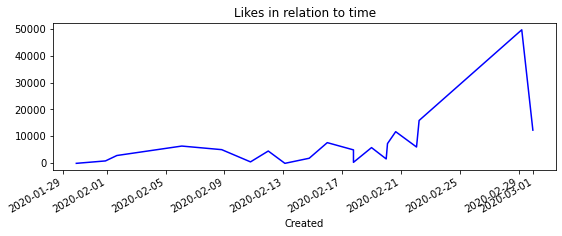

In [43]:
#Time Series
LikesToTime = pd.Series(data = dftweet['Likes'].values, index = dftweet['Created'])
LikesToTime.plot(figsize=(9,3), color='b')
plt.title('Likes in relation to time')
plt.show()

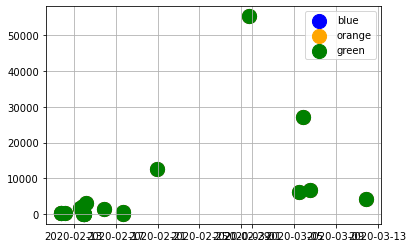

In [28]:
fig, ax = plt.subplots()
for color in ['blue', 'orange', 'green']:
    n = 10
    x = dftweet['Created']
    y = dftweet['Likes']
    scale = 200.0
    ax.scatter(x, y, c=color, s=scale, label = color)

ax.legend()
ax.grid(True)

plt.show()

In [ ]:
#Time Series
LikesToTime = pd.Series(data = dftweet['Likes'].values, index = dftweet['Created'])
LikesToTime.plot(figsize=(9,3), color='b')
plt.title('Likes in relation to time')
plt.show()